<a href="https://colab.research.google.com/github/5chap/myPortal/blob/master/eData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HAMOYE INTERNSHIP STAGE A QUIZ**

In [ ]:
# import external electricity utility data as comma seperated list(csv)
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np



eData = pd.read_csv("https://raw.githubusercontent.com/WalePhenomenon/climate_change/master/fuel_ferc1.csv")


In [ ]:
# Total number of rows(records) and columns(feature names) in the fuel dataset
# 29523 rows and 11 columns
eData.shape

(29523, 11)

In [ ]:
# Data types of individual columns in the fuel dataset
eData.dtypes

record_id                        object
utility_id_ferc1                  int64
report_year                       int64
plant_name_ferc1                 object
fuel_type_code_pudl              object
fuel_unit                        object
fuel_qty_burned                 float64
fuel_mmbtu_per_unit             float64
fuel_cost_per_unit_burned       float64
fuel_cost_per_unit_delivered    float64
fuel_cost_per_mmbtu             float64
dtype: object

In [ ]:
# first five rows in the eData fuel dataset
eData.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


In [ ]:
# last five rows in the eData fuel dataset
eData.tail()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
29518,f1_fuel_2018_12_12_0_13,12,2018,neil simpson ct #1,gas,mcf,18799.0,1.059,4.78,4.78,9.03
29519,f1_fuel_2018_12_12_1_1,12,2018,cheyenne prairie 58%,gas,mcf,806730.0,1.050,3.65,3.65,6.95
29520,f1_fuel_2018_12_12_1_10,12,2018,lange ct facility,gas,mcf,104554.0,1.060,4.77,4.77,8.99
29521,f1_fuel_2018_12_12_1_13,12,2018,wygen 3 bhp 52%,coal,ton,315945.0,16.108,3.06,14.76,1.11
29522,f1_fuel_2018_12_12_1_14,12,2018,wygen 3 bhp 52%,gas,mcf,17853.0,1.059,0.00,0.00,11.68


In [ ]:
# the first 100 records in the fuel data set
eData.iloc[:100]

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570
...,...,...,...,...,...,...,...,...,...,...,...
95,f1_fuel_1994_12_17_0_8,17,1994,weatherspn,coal,ton,96572.0,24.962,42.99,42.36,1.722
96,f1_fuel_1994_12_17_0_10,17,1994,w.h. weatherspoon,gas,mcf,89965.0,1.034,2.94,0.00,2.843
97,f1_fuel_1994_12_17_0_14,17,1994,h. f. lee,coal,ton,354165.0,25.384,49.71,50.41,1.959
98,f1_fuel_1994_12_17_1_6,17,1994,l. v. sutton,coal,ton,490256.0,25.070,41.34,40.73,1.649


In [ ]:
# Another format to retrieve the last five records in the dataset
eData.iloc[-5:]

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
29518,f1_fuel_2018_12_12_0_13,12,2018,neil simpson ct #1,gas,mcf,18799.0,1.059,4.78,4.78,9.03
29519,f1_fuel_2018_12_12_1_1,12,2018,cheyenne prairie 58%,gas,mcf,806730.0,1.050,3.65,3.65,6.95
29520,f1_fuel_2018_12_12_1_10,12,2018,lange ct facility,gas,mcf,104554.0,1.060,4.77,4.77,8.99
29521,f1_fuel_2018_12_12_1_13,12,2018,wygen 3 bhp 52%,coal,ton,315945.0,16.108,3.06,14.76,1.11
29522,f1_fuel_2018_12_12_1_14,12,2018,wygen 3 bhp 52%,gas,mcf,17853.0,1.059,0.00,0.00,11.68


### **A summary of Plants in the dataset and the total quantity of fuel burned per plant**

In [ ]:

# shows minimum, maximum and total fuel per Plant and the number of times each occurs
eData.groupby(['plant_name_ferc1']).fuel_qty_burned.agg([len, min, max, sum])

,len,min,max,sum
plant_name_ferc1,,,,
(1)sta98,1.0,33044.0,33044.0,33044.0
(2) scriba sta. 99,1.0,107129.0,107129.0,107129.0
(n) contra costa,1.0,11338219.0,11338219.0,11338219.0
(n) pittsburg,1.0,34851184.0,34851184.0,34851184.0
(n)(t)moss landing,1.0,87863451.0,87863451.0,87863451.0
...,...,...,...,...
zimmer- aepgr share,2.0,10422.0,716585.0,727007.0
zion,3.0,920189.0,1218311.0,3242901.0
zorn,12.0,432.0,57060.0,232678.0


In [144]:
# check cost fuel per unit delivered above 50.00 in the year 2018
eData.loc[(eData.report_year == 2018) & (eData.fuel_cost_per_unit_delivered > 50.0)]

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
28572,f1_fuel_2018_12_122_0_2,122,2018,big stone,oil,bbl,2344.0,5.880000,63.123,63.123,10.735
28574,f1_fuel_2018_12_122_0_5,122,2018,coyote,oil,bbl,2094.0,5.880000,87.516,87.516,14.884
28576,f1_fuel_2018_12_122_0_8,122,2018,neal #4,oil,bbl,3251.0,5.838000,89.799,89.799,15.382
28578,f1_fuel_2018_12_122_0_13,122,2018,yankton,oil,bbl,131.0,5.796000,126.857,126.857,21.887
28579,f1_fuel_2018_12_122_1_1,122,2018,aberdeen #1,oil,bbl,422.0,5.796000,135.432,135.432,23.366
...,...,...,...,...,...,...,...,...,...,...,...
29495,f1_fuel_2018_12_191_0_6,191,2018,gordon evans ctf,oil,bbl,10030.0,5.846053,94.777,94.900,16.212
29502,f1_fuel_2018_12_191_1_9,191,2018,jeffrey (jec),oil,bbl,19764.0,5.835849,88.553,101.010,15.174
29505,f1_fuel_2018_12_432_0_2,432,2018,pueblo diesels,oil,bbl,81.0,5.694696,101.330,101.330,17.790
29506,f1_fuel_2018_12_432_0_5,432,2018,airport - pueblo,oil,bbl,133.0,5.756940,95.530,95.530,16.590


In [ ]:
print("Total Fuel Cost Per Unit Delivered:")
eData.fuel_cost_per_unit_delivered.sum()

Total Fuel Cost Per Unit Delivered:


27089432.369

In [ ]:
print("Total Fuel Cost Per Unit Burned:")
eData.fuel_cost_per_unit_burned.sum()

Total Fuel Cost Per Unit Burned:


6159945.342999999

In [ ]:
print("Total Fuel Cost Per mmbtu:")
eData.fuel_cost_per_mmbtu.sum()


Total Fuel Cost Per mmbtu:


569922.44553

### **A summary of features(columns) in the Fuel Utility Dataset and the corresponding number of null values in each feature:**


In [ ]:
# check for null columns
eData.isnull().sum()

record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64

##### **Observation: fuel_unit column has a total of 180 missing data. Every other column has data value.**

In [ ]:
# Check if duplicate record exist
eData.duplicated().any()

False

In [108]:
# Prints Oil fuel type records
eData.loc[(eData.fuel_type_code_pudl == 'oil')]

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
14,f1_fuel_1994_12_6_0_2,6,1994,clinch river,oil,bbl,6510.0,5.875338,32.130,23.444,5.469
19,f1_fuel_1994_12_6_0_14,6,1994,kanawha river,oil,bbl,3505.0,5.774958,33.321,26.280,5.770
21,f1_fuel_1994_12_6_1_8,6,1994,mountainr,oil,bbl,50013.0,5.845644,30.319,23.884,5.187
23,f1_fuel_1994_12_6_1_11,6,1994,philip sporn-apco,oil,bbl,13969.0,5.742870,32.184,30.508,5.604
25,f1_fuel_1994_12_6_1_14,6,1994,philip sporn ttl plt,oil,bbl,48750.0,5.742828,32.186,30.507,5.605
...,...,...,...,...,...,...,...,...,...,...,...
29502,f1_fuel_2018_12_191_1_9,191,2018,jeffrey (jec),oil,bbl,19764.0,5.835849,88.553,101.010,15.174
29505,f1_fuel_2018_12_432_0_2,432,2018,pueblo diesels,oil,bbl,81.0,5.694696,101.330,101.330,17.790
29506,f1_fuel_2018_12_432_0_5,432,2018,airport - pueblo,oil,bbl,133.0,5.756940,95.530,95.530,16.590
29507,f1_fuel_2018_12_432_0_8,432,2018,rocky ford diesels,oil,bbl,320.0,5.719602,98.180,98.150,17.160


### **Nuclear energy source accounts for the highest amount of money spent on power as shown in the statistical summary report below:**

In [7]:
# summary of the different sources of fuel used in my fuel dataset and the total amount spent on each catogory
filtered1 = eData[['fuel_type_code_pudl', 'fuel_cost_per_unit_burned']]
filtered1 = filtered1.groupby(['fuel_type_code_pudl']).fuel_cost_per_unit_burned.agg([sum])
filtered1






,sum
fuel_type_code_pudl,
coal,576254.381
gas,156891.829
nuclear,4053318.428
oil,1361824.819
other,3048.394
waste,8607.492


### **Data Visualization with Bar chart and Lineplot (using the result from the filtered fuel dataset above):**

Text(0.5, 0, 'Various fuel sources used')

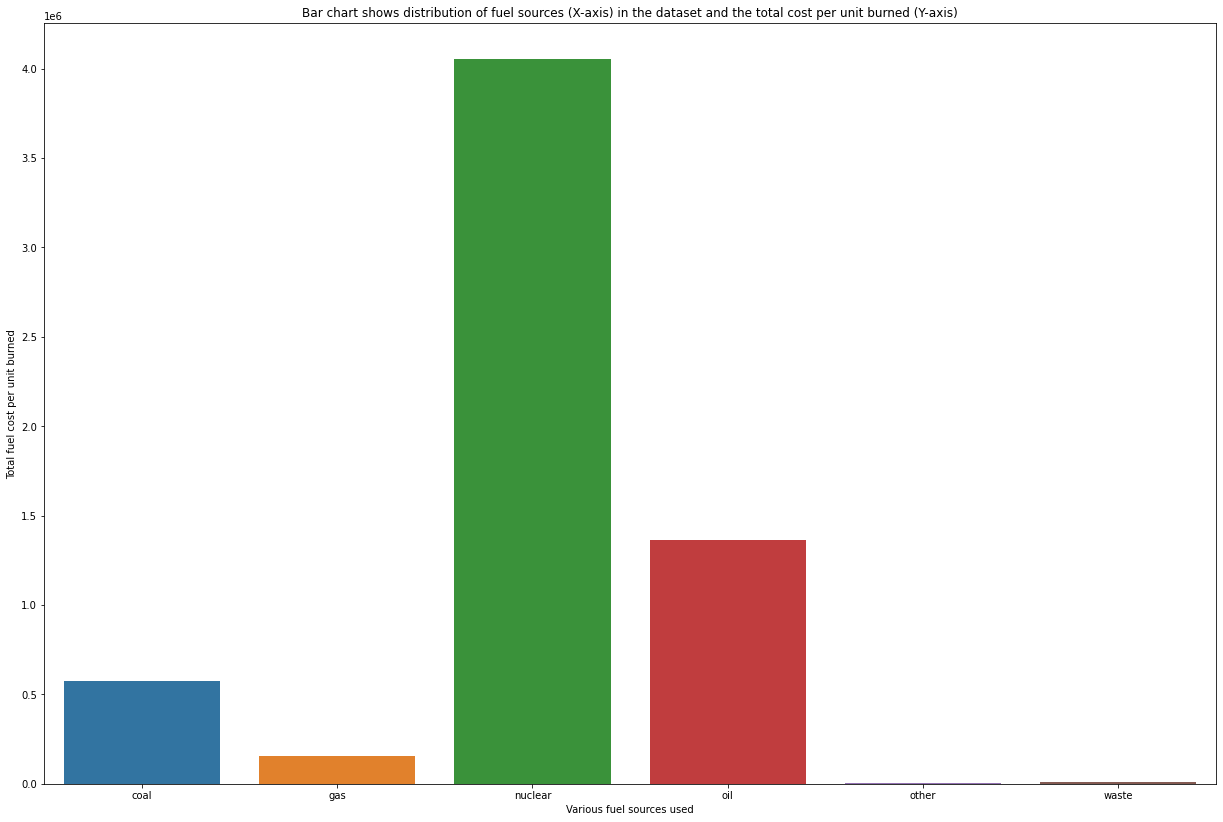

In [8]:
# Define the layout of the plot
plt.figure(figsize=(21, 14))

# Label the chart
plt.title("Bar chart shows distribution of fuel sources (X-axis) in the dataset and the total cost per unit burned (Y-axis)")

# Plot the bar chart
sns.barplot(x = filtered1.index, y = filtered1.iloc[:,0])

# Label y-axis
plt.ylabel("Total fuel cost per unit burned")

# Label x-axis
plt.xlabel("Various fuel sources used")

### Observation: As can be seen in the bar chart above fuel from oil follows nuclear fuel source in terms of usage. Nuclear fuel is free and safe. However, others aren't. Excess emission into the atmosphere of carbons from these fuel sources;Oil, Coal, Gas and others results in global warming which adversely affects and endangers the existence of humans and other living beings on earth and in sea. The reduction in over reliance on these carbon fuels will significantly reduce climatic change and the resulting global warming. Therefore, more nuclear fuel energy should be used in our plants globally in place of unsafe fuel from Carbon compounds.

In [130]:
# Filter the required features from fuel dataset (eData)
filtered2 = eData[['report_year','fuel_type_code_pudl', 'fuel_cost_per_unit_burned']]

# Categorise the filter using groupby function based on report year and fuel type
filtered2 = filtered2.groupby(['report_year', 'fuel_type_code_pudl']).fuel_cost_per_unit_burned.sum()

# reset the index
filtered2.reset_index()

,report_year,fuel_type_code_pudl,fuel_cost_per_unit_burned
0,1994,coal,14984.572
1,1994,gas,10792.496
2,1994,nuclear,227983.354
3,1994,oil,9362.194
4,1994,other,116.737
...,...,...,...
143,2018,coal,9488.197
144,2018,gas,4322.494
145,2018,nuclear,173267.161
146,2018,oil,33836.602


In [115]:
eData.groupby(['fuel_type_code_pudl']).fuel_cost_per_unit_burned.describe()

count       6.000000
mean      873.814549
std      2000.311758
min        13.659397
25%        18.569923
50%        43.469976
75%       143.513272
max      4955.157002
Name: fuel_cost_per_unit_burned, dtype: float64

In [7]:
# Total fuel quantity burned from 1994 to 2018
eData.loc[(eData.report_year > 1993) & (eData.report_year < 1995)].groupby('fuel_type_code_pudl').fuel_qty_burned.agg([min,max,sum])

,min,max,sum
fuel_type_code_pudl,,,
coal,1586.0,35063261.0,7.172082e+08
gas,15.0,89379732.0,2.432212e+09
nuclear,290.0,43461380.0,2.069366e+08
oil,2.0,136863.0,1.469716e+06
other,75.0,2654942.0,5.094458e+06
waste,113.0,506041.0,1.242241e+06


### **Prediction Model using Forest Modelling tool**

In [143]:
# In this model i used 'fuel_cost__per_unit_burned' as my prediction target labelled "y" and 6 feature names (columns) in a list named "X" from the fuel dataset as my predictive values 

# Define target object "y"
y = eData.fuel_cost_per_unit_burned 

# Select features (Columns) and create X 
features_List = ['report_year', 'fuel_qty_burned', 'fuel_mmbtu_per_unit','fuel_cost_per_unit_burned', 'fuel_cost_per_unit_delivered', 'fuel_cost_per_mmbtu']
X = eData[features_List]

# Split features into dataset for training(training data) and dataset meant for validation (validation data)
X_Trainer, X_Validate, y_Trainer, y_validate = train_test_split(X, y, random_state = 1)

# Model selection
fuel_cost_model = RandomForestRegressor(random_state = 1)

# Model fitting
fuel_cost_model.fit(X_Trainer, y_Trainer)

# Do validation prediction
predicted_value = fuel_cost_model.predict(X_Validate)

# compute mean absolute error value
compute_mae = mean_absolute_error(predicted_value, y_validate)

print("Validation Mean Absolute Error without specifying number of leaf nodes is: {:,.0f}".format(compute_mae))
print(predicted_value)
print(eData.fuel_cost_per_unit_burned.head())




Validation Mean Absolute Error without specifying number of leaf nodes is: 8
[22.19879 93.60715 28.73884 ... 97.15306  7.9488  28.70052]
0    18.59
1    18.58
2    39.72
3    47.21
4     2.77
Name: fuel_cost_per_unit_burned, dtype: float64


## **CONCLUSION:** 
**From the first five values of actual fuel_cost_per_unit_burned as at the dates mentioned in the dataset;** 
**18.59, 18.58, 39.72, 47.21, 2.77**
**And the predicted outputs from my model above;**
**22.10, 93.61, 28.74, 97.15, 7.95 etc**
**Other modelling tools that could be used are Decision Tree (Less acurate compared to Forest model) and XGBOOST(a more acurate model than Forest)**